In [4]:
import pandas as pd
import numpy as np
from os import listdir

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import CenteredNorm
%matplotlib inline

In [6]:
from sklearn import metrics
from scipy import stats

In [7]:
def merge_results_frames(df,df2):
    for idx,r in df.iterrows():
        g = r['gamma']
        p = r['bias']
        for col in df.columns:
            if col == 'gamma' or col == 'bias':
                continue
            df.loc[(df['gamma']==g) & (df['bias']==p),col]+=df2.loc[(df2['gamma']==g) & (df2['bias']==p),col]

def str2list(strarray):
    return [float(x) for x in strarray.strip('[] ').split()]

def df_str2list(df):
    for col in df.columns:
        if col == 'gamma' or col == 'bias':
            continue
        df[col] = df[col].apply(str2list)

In [8]:
results_dir='Results/'

resdict = {}
first = True
for filename in listdir(results_dir):
    if first:
        df = pd.read_csv(results_dir+filename)
        df_str2list(df)
        first = False
    else:
        df2 = pd.read_csv(results_dir+filename)
        df_str2list(df2)
        merge_results_frames(df,df2)

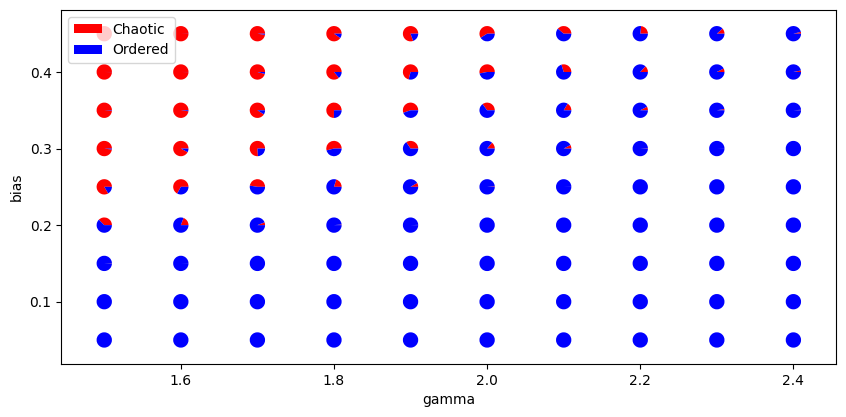

In [9]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
varx = 'gamma'
vary = 'bias'
for _,row in df.iterrows():
    x = np.mean(row[varx])
    y = np.mean(row[vary])
    ones = np.mean([derrida > 1 for derrida in row['Derrida']])
    ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    ones = [derrida > 1 for derrida in row['Derrida']]
    

legend_elements = [Patch(facecolor='r', label='Chaotic'), Patch(facecolor='b', label='Ordered')]
plt.xlabel(varx)
plt.ylabel(vary)
ax.legend(handles=legend_elements, loc='best')

In [10]:
dictall = {}
for _,row in df.iterrows():
    for col in df.columns:
        if col in ['gamma','bias']:
            rowlist = [row[col]]*len(row['Derrida'])
        else:
            rowlist = row[col]
        if col in dictall:
            dictall[col] += rowlist
        else:
           dictall[col] = rowlist.copy()
           
dfall = pd.DataFrame(dictall)

dfall['entropy'] = -(dfall['bias']*np.log2(dfall['bias']))-((1-dfall['bias'])*np.log2(1-dfall['bias']))
dfall['entropy'] = -(dfall['bias']*np.log(dfall['bias']))-((1-dfall['bias'])*np.log(1-dfall['bias']))
dfall['variance'] = dfall['bias']*(1-dfall['bias'])

dfall['avgS']=dfall['avgKe']-dfall['avgKc']
dfall['avgSe']=3.33*dfall['avgKe']*dfall['variance']
dfall['avgSk']=2*dfall['avgK']*dfall['variance']
dfall['regime']=(dfall['Derrida']>1).astype(int) - (dfall['Derrida']<1).astype(int)
dfall['bve']=dfall['avgSe']/(2*dfall['avgK'])
dfall['avgSe_sample']=3.33*dfall['avgKe']*dfall['bve']
dfall['avgKe_ent']=dfall['avgKe']*dfall['entropy']
dfall=dfall.sample(frac = 1)
dfall

,gamma,bias,Derrida,avgK,medK,avgKe,medKe,avgKc,medKc,entropy,variance,avgS,avgSe,avgSk,regime,bve,avgSe_sample,avgKe_ent
27132,2.2,0.35,0.670,1.71,1.0,0.868676,1.0,0.158656,0.0,0.647447,0.2275,0.710020,0.658088,0.77805,-1,0.192423,0.556621,0.562422
13581,1.8,0.40,1.129,2.30,1.0,1.521892,1.0,0.345095,0.0,0.673012,0.2400,1.176797,1.216296,1.10400,1,0.264412,1.340015,1.024251
28561,2.3,0.10,0.289,1.48,1.0,0.355369,0.0,0.088455,0.0,0.325083,0.0900,0.266914,0.106504,0.26640,-1,0.035981,0.042579,0.115524
9287,1.7,0.30,1.132,2.69,1.5,1.649268,1.0,0.512881,0.0,0.610864,0.2100,1.136387,1.153333,1.12980,1,0.214374,1.177356,1.007479
9923,1.7,0.40,1.228,2.57,1.0,1.716408,1.0,0.417106,0.0,0.673012,0.2400,1.299302,1.371753,1.23360,1,0.266878,1.525379,1.155163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13508,1.8,0.40,1.246,2.60,1.0,1.712372,1.0,0.449076,0.0,0.673012,0.2400,1.263296,1.368527,1.24800,1,0.263178,1.500695,1.152446
15125,1.9,0.15,0.628,2.16,1.0,1.021538,0.0,0.407595,0.0,0.422709,0.1275,0.613943,0.433719,0.55080,-1,0.100398,0.341526,0.431813
23235,2.1,0.30,0.832,2.05,1.0,1.073628,1.0,0.260347,0.0,0.610864,0.2100,0.813281,0.750788,0.86100,-1,0.183119,0.654684,0.655841
8365,1.7,0.20,0.811,2.33,1.0,1.139872,1.0,0.347059,0.0,0.500402,0.1600,0.792813,0.607324,0.74560,-1,0.130327,0.494692,0.570395


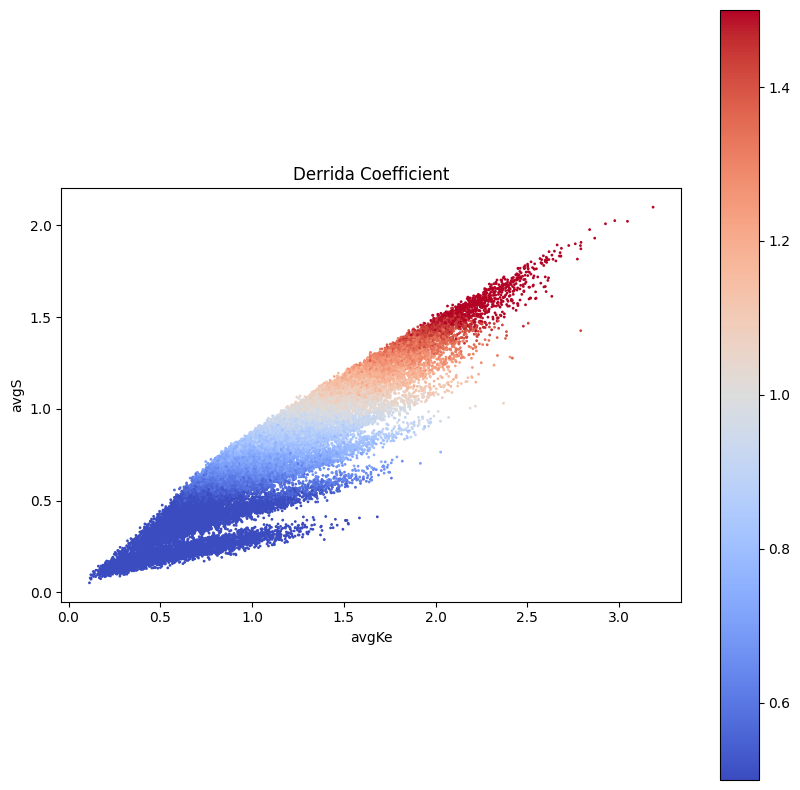

In [30]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgKe'
vary = 'avgS'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.show()

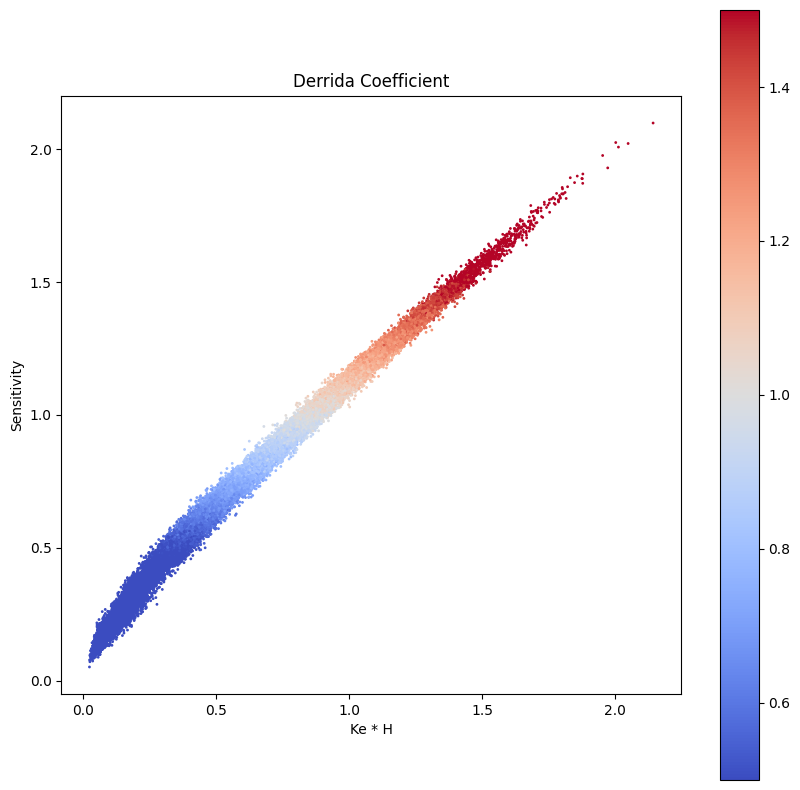

In [31]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Ke * H")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

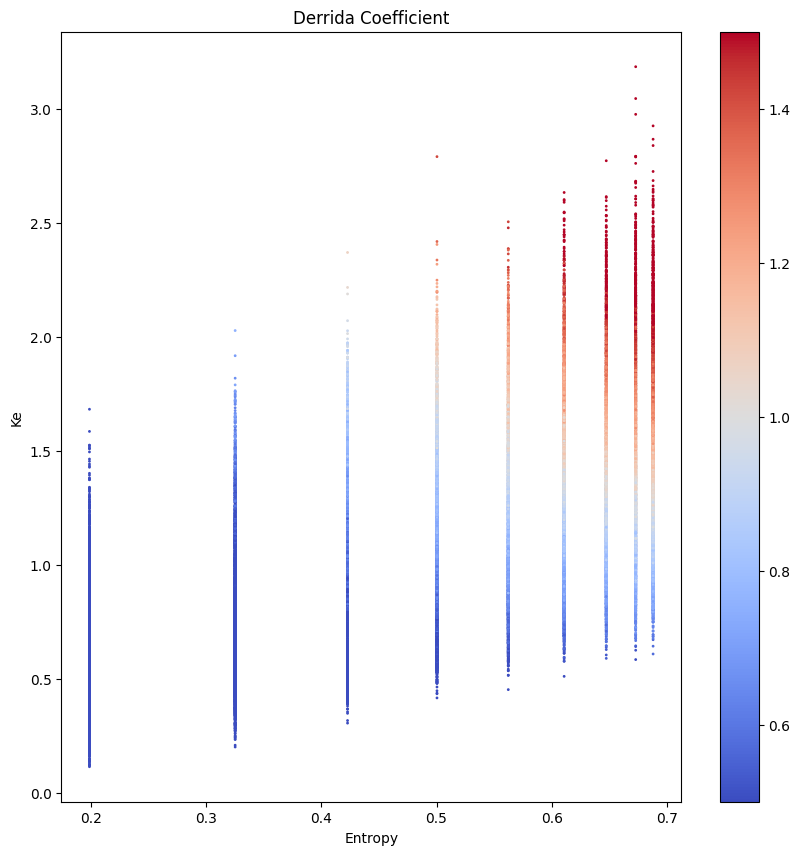

In [32]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['entropy'],dfall['avgKe'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Entropy")
plt.ylabel("Ke")
plt.title('Derrida Coefficient')
plt.show()

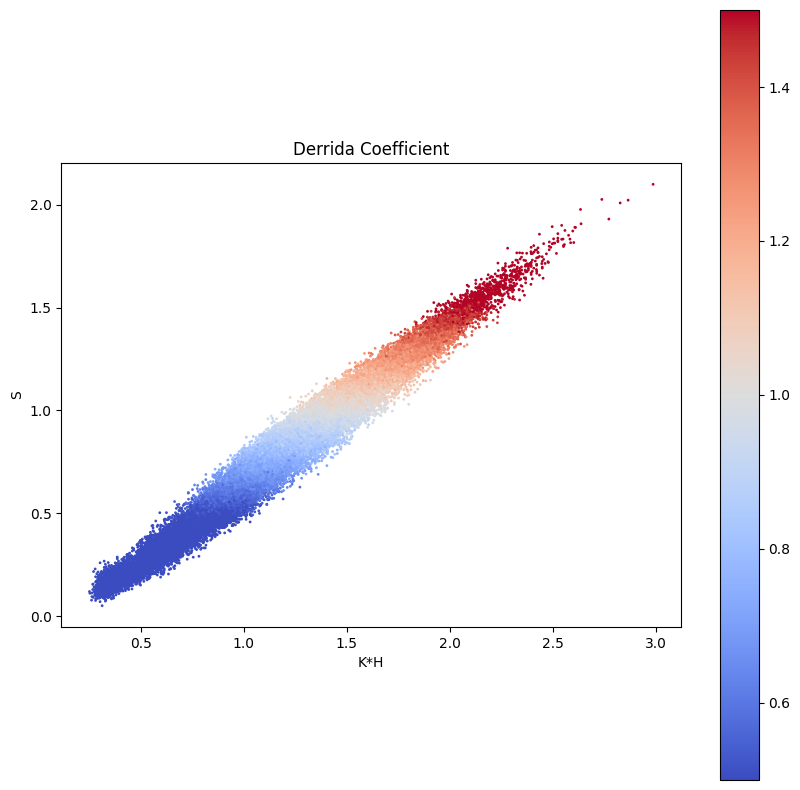

In [33]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['avgK']*(dfall['avgKe_ent']/dfall['avgKe']), dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("K*H")
plt.ylabel("S")
plt.title('Derrida Coefficient')
plt.show()

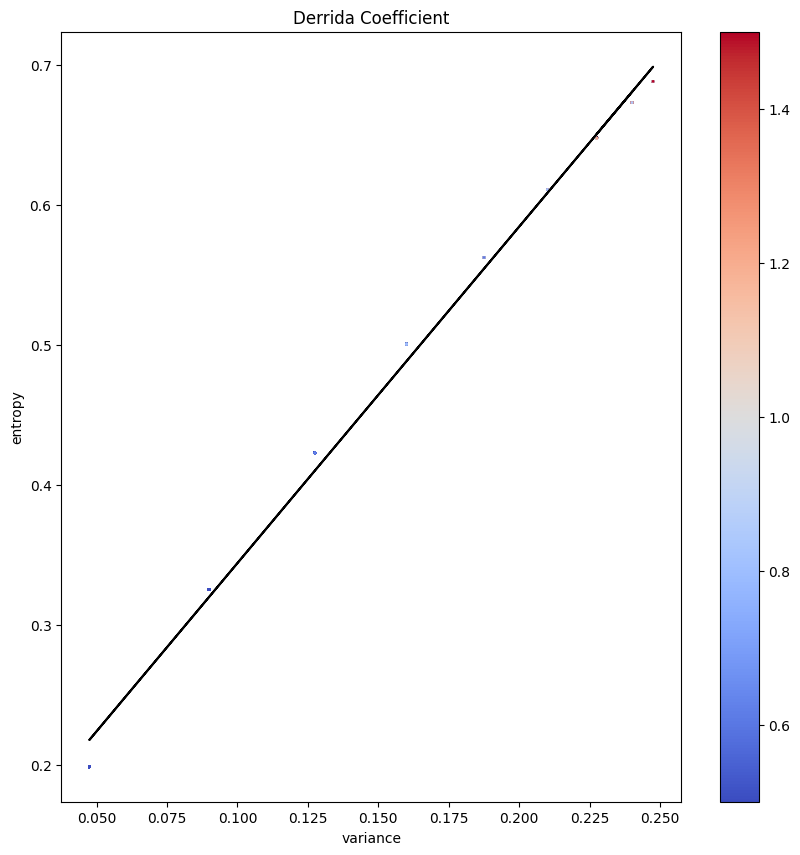

In [34]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['variance'],dfall['entropy'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)

linear_model=np.polyfit(dfall['variance'],dfall['entropy'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dfall['variance'],linear_model_fn(dfall['variance']),color="black")

#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("variance")
plt.ylabel("entropy")
plt.title('Derrida Coefficient')
plt.show()

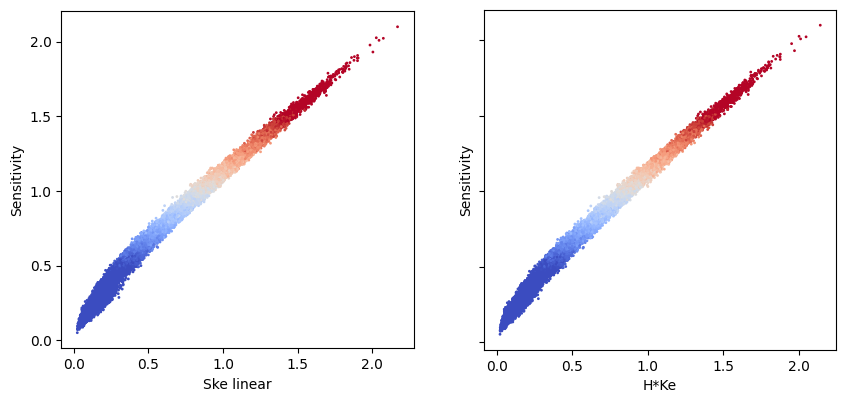

In [35]:
fig, ax = plt.subplots(1,2,sharey='row',figsize=(10, 10),facecolor='white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax[0].scatter(dfall['avgKe']*linear_model_fn(dfall['variance']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[0].set_aspect('equal', 'box')
ax[0].set_xlabel("Ske linear")
ax[0].set_ylabel("Sensitivity")

sc=ax[1].scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[1].set_aspect('equal', 'box')
ax[1].set_xlabel("H*Ke")
ax[1].set_ylabel("Sensitivity")
#plt.title('Derrida Coefficient')
plt.show()

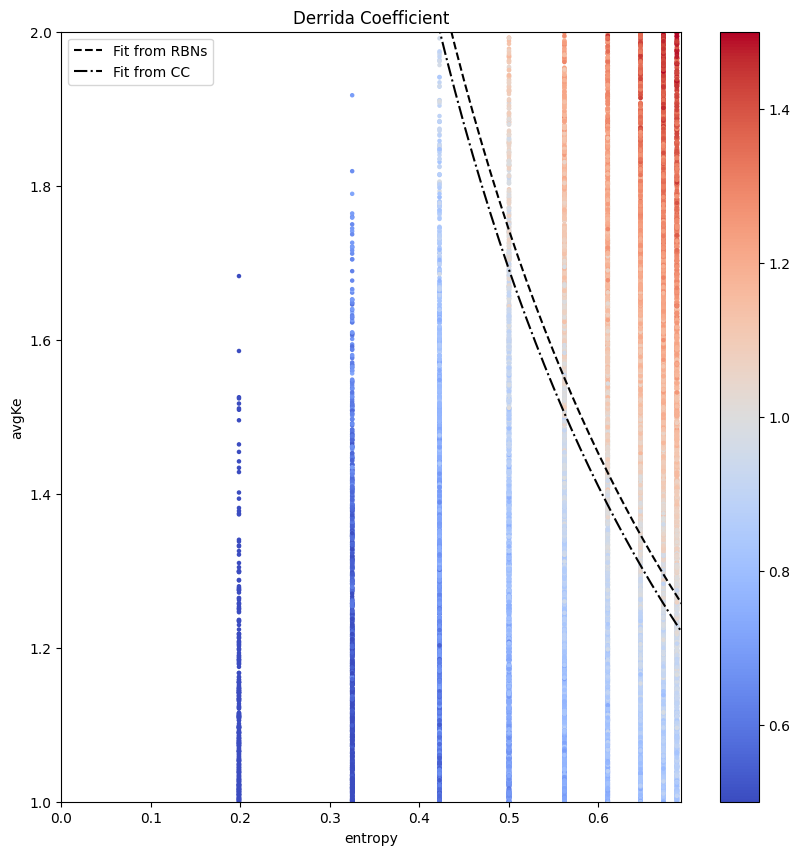

In [49]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'entropy'
vary = 'avgKe'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=5,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0,label=None)
px = np.arange(0.01,1,0.01)
py=(1-0.15)/(px*0.975)
py2=(1-0.78)/(px*0.26)
ax.plot(px,py,'--k',label='Fit from RBNs')
ax.plot(px,py2,'-.k',label='Fit from CC')
ax.set_ylim(1,2)
ax.set_xlim(0,np.log(2))
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'entropy'
vary = 'avgKe'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=100,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0,label=None)
px = np.arange(0.01,1,0.01)
py=(1-0.15)/(px*0.975)
py2=(1-0.78)/(px*0.26)
ax.plot(px,py,'--k',label='Fit from RBNs')
ax.plot(px,py2,'-.k',label='Fit from CC')
ax.set_ylim(1,2)
ax.set_xlim(0,np.log(2))
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.legend()
plt.show()

In [17]:
dfall_trim = dfall.sample(frac=1.0)


m,b,r,p,s=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
print('V-H:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgS'],dfall_trim['Derrida'])
print('S-d:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgKe_ent'],dfall_trim['Derrida'])
print('HKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

mVH,bVH,_,_,_=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
m,b,r,p,s=stats.linregress(dfall_trim['avgKe']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*dfall_trim['entropy'],dfall_trim['Derrida'])
print('HK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSe'],dfall_trim['Derrida'])
print('Se-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSk'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(((dfall_trim['avgK']+dfall_trim['avgKe'])/2)*dfall_trim['entropy'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')


V-H:   r**2 = 0.9958508089015518,	m = 2.4044182468962596,	b = 0.1035236933232978,	p = 0.0,	s = 0.0008284254051158369
S-d:   r**2 = 0.9940370519898931,	m = 1.000099762130353,	b = 0.0001134165099163642,	p = 0.0,	s = 0.00041345796640593775
HKe-d: r**2 = 0.9835650238565488,	m = 0.975159057401521,	b = 0.15379442023025036,	p = 0.0,	s = 0.0006728484786695741
LKe-d: r**2 = 0.9803796119525585,	m = 0.9662182654223374,	b = 0.15962580564919604,	p = 0.0,	s = 0.0007296099013367996
HK-d:  r**2 = 0.9646396500513227,	m = 0.773794624703717,	b = -0.1262281081693729,	p = 0.0,	s = 0.0007907883204970841
LK-d:  r**2 = 0.9671780792370823,	m = 0.7759010893953839,	b = -0.1286722359023763,	p = 0.0,	s = 0.0007629462640746467
Se-d:  r**2 = 0.9780022711371467,	m = 0.792125216134814,	b = 0.20649327740766266,	p = 0.0,	s = 0.0006341202826594571
Sk-d:  r**2 = 0.9773025154268691,	m = 0.9998019153688102,	b = 0.0003106586759291652,	p = 0.0,	s = 0.0008132931905524936
Sk-d:  r**2 = 0.97799199337539,	m = 0.8673004565373871,	

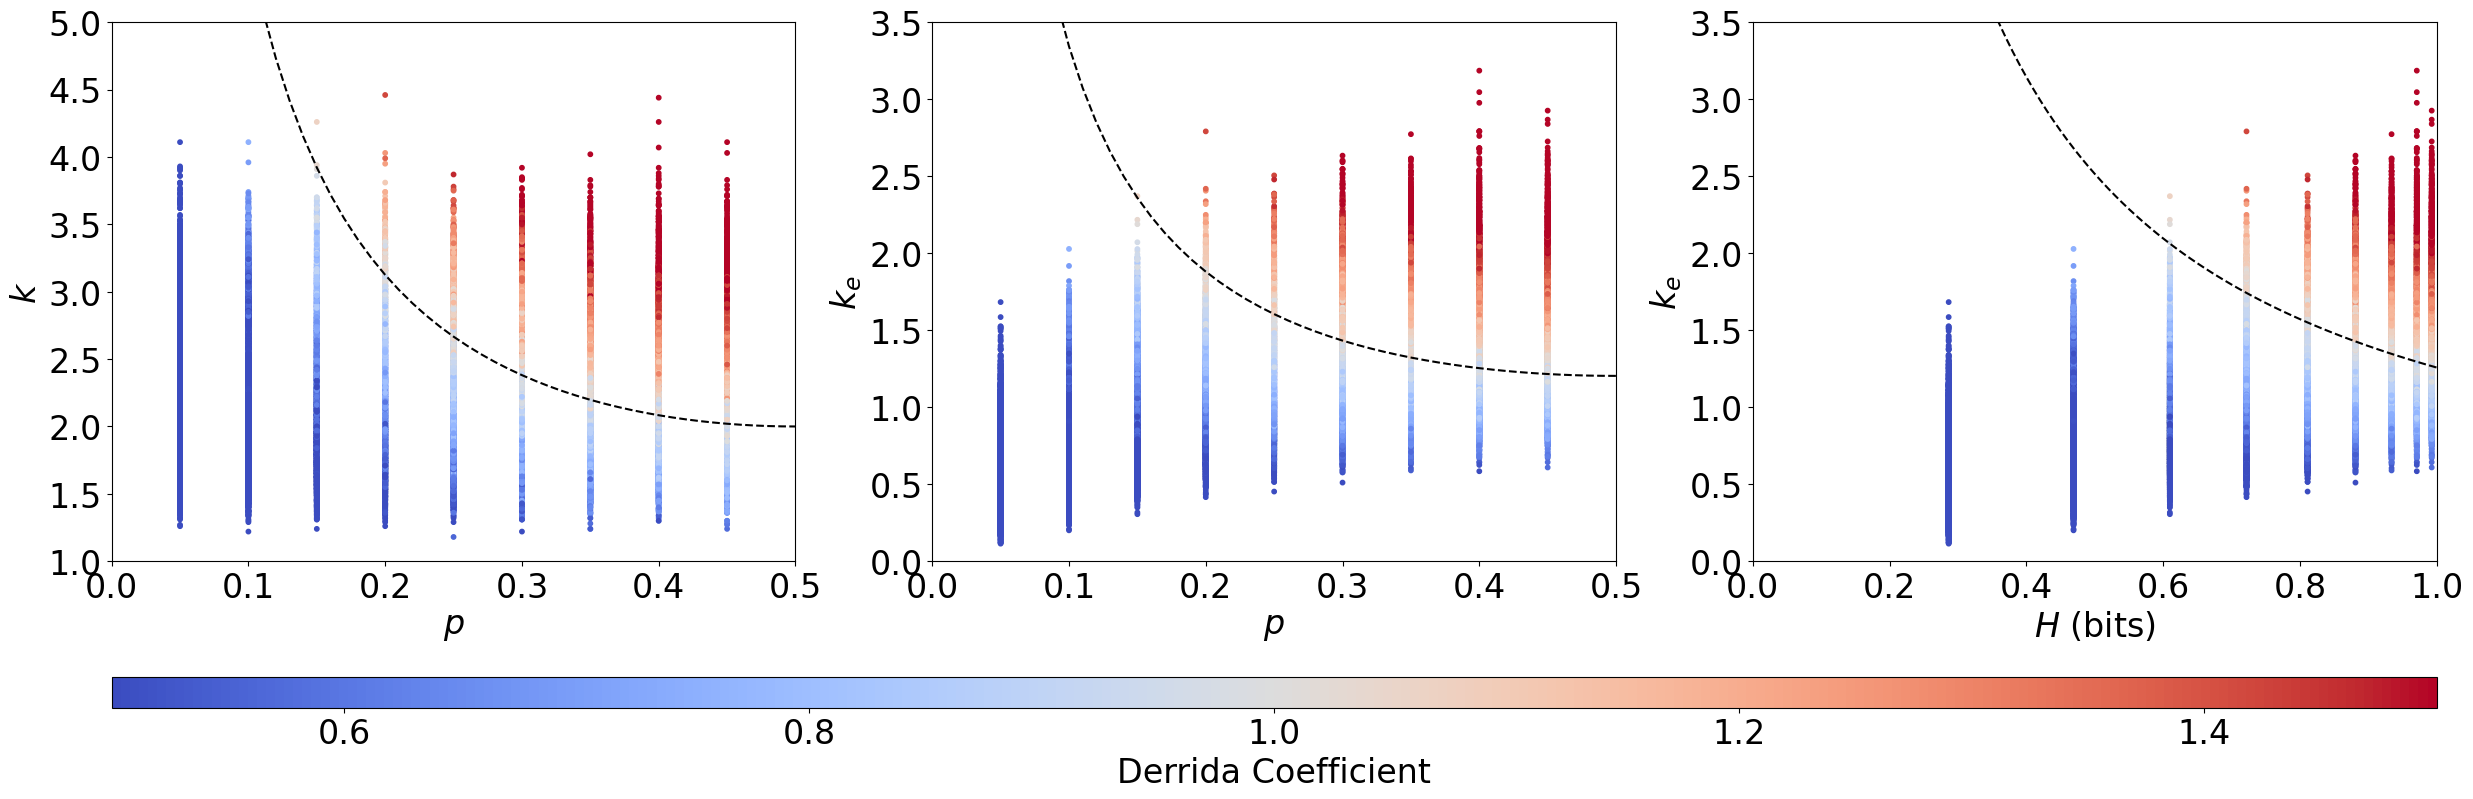

<Figure size 640x480 with 0 Axes>

In [63]:
fig, ax = plt.subplots(1,3,figsize=(30, 10),facecolor='white')

fs = 24
msize=10
cmap = plt.cm.get_cmap('coolwarm')#.reversed()

varx = 'bias'
vary = 'avgK'
sc=ax[0].scatter(dfall[varx],dfall[vary],s=msize,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
px = np.arange(0.01,0.51,0.01)
py=1/(2*px*(1-px))
py2=(1-0.9040361570466304)/(0.1373657043428697*px*(1-px))
ax[0].plot(px,py,'--k',label='Linear critical boundary fit')
#ax[0].plot(px,py2,'-.k',label='Fit from CC')
ax[0].set_ylim(1,5)
ax[0].set_xlim(0,0.5)
#ax[0].legend(loc='upper left',fontsize=fs)
ax[0].set_xlabel('$p$',fontsize=fs)
ax[0].set_ylabel('$k$',fontsize=fs)
ax[0].tick_params(axis='both', which='major', labelsize=fs)

varx = 'bias'
vary = 'avgKe'
sc=ax[1].scatter(dfall[varx],dfall[vary],s=msize,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
px = np.arange(0.01,0.51,0.01)
py=(1-.2065)/(0.792*3.33*px*(1-px))
py2=(1-0.809)/(0.645*px*(1-px))
ax[1].plot(px,py,'--k',label='Linear critical boundary fit')
#ax[1].plot(px,py2,'-.k',label='Fit from CC')
ax[1].set_ylim(0,3.5)
ax[1].set_xlim(0,0.5)
#ax[1].legend(loc='upper left',fontsize=fs)
ax[1].set_xlabel('$p$',fontsize=fs)
ax[1].set_ylabel('$k_e$',fontsize=fs)
ax[1].tick_params(axis='both', which='major', labelsize=fs)

varx = 'entropy'
vary = 'avgKe'
sc=ax[2].scatter(dfall[varx]/np.log(2),dfall[vary],s=msize,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0,label=None)
px = np.arange(0.01,1.1,0.01)
py=(1-0.15)/(px*0.975*np.log(2))
py2=(1-0.78)/(px*0.26*np.log(2))
ax[2].plot(px,py,'--k',label='Linear critical boundary fit')
#ax[2].plot(px,py2,'-.k',label='Fit from CC')
ax[2].set_ylim(0,3.5)
ax[2].set_xlim(0,1)
#ax[2].legend(loc='upper left',fontsize=fs)
ax[2].set_xlabel('$H$ (bits)',fontsize=fs)
ax[2].set_ylabel('$k_e$',fontsize=fs)
ax[2].tick_params(axis='both', which='major', labelsize=fs)

cbar=fig.colorbar(sc,ax=ax,location='bottom',aspect=75)
cbar.ax.tick_params(axis='both',labelsize=fs)
cbar.set_label('Derrida Coefficient',fontsize=fs)
#fig.suptitle('Derrida Coefficient',fontsize=fs)

plt.show()
plt.savefig('boundary_fits_on_rbn_networks.png')

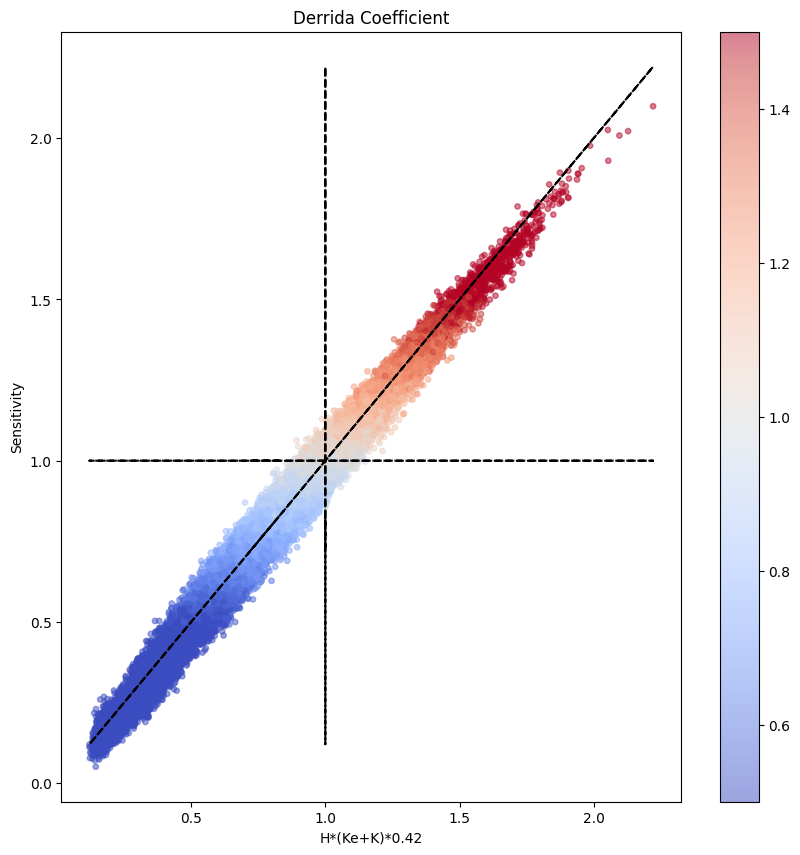

In [44]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')
x=.3*(dfall['avgKe']+dfall['avgK'])*dfall['entropy']/np.log(2)
sc=ax.scatter(x,dfall['avgS'],s=15,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=0.5)
ax.plot(x,x,'k--')
ax.plot(x,x/x,'k--')
ax.plot(x/x,x,'k--')
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("H*(Ke+K)*0.42")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

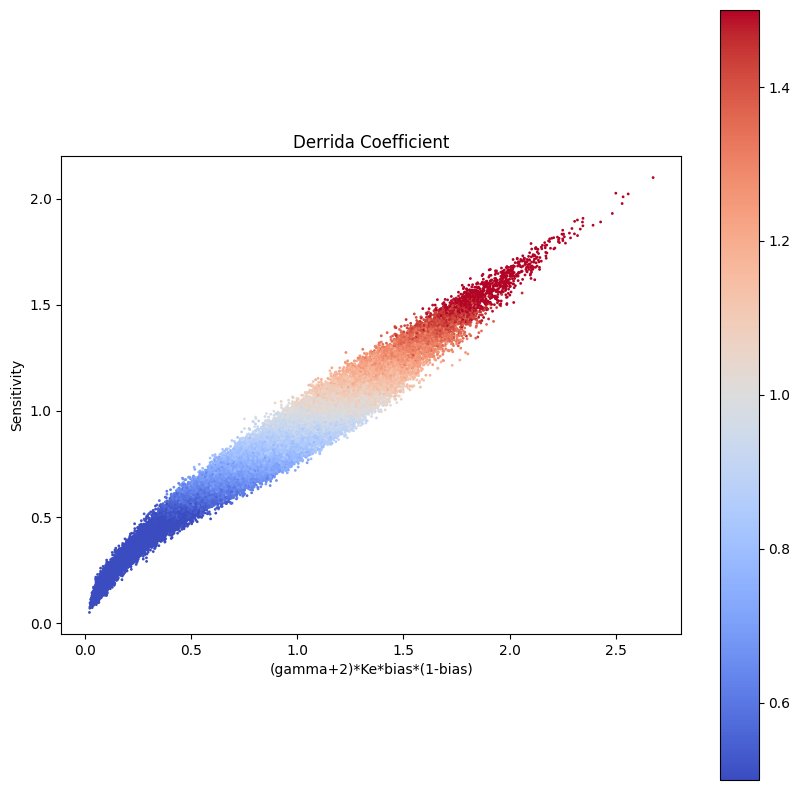

In [36]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter((dfall['gamma']+2)*dfall['avgKe']*dfall['bias']*(1-dfall['bias']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("(gamma+2)*Ke*bias*(1-bias)")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

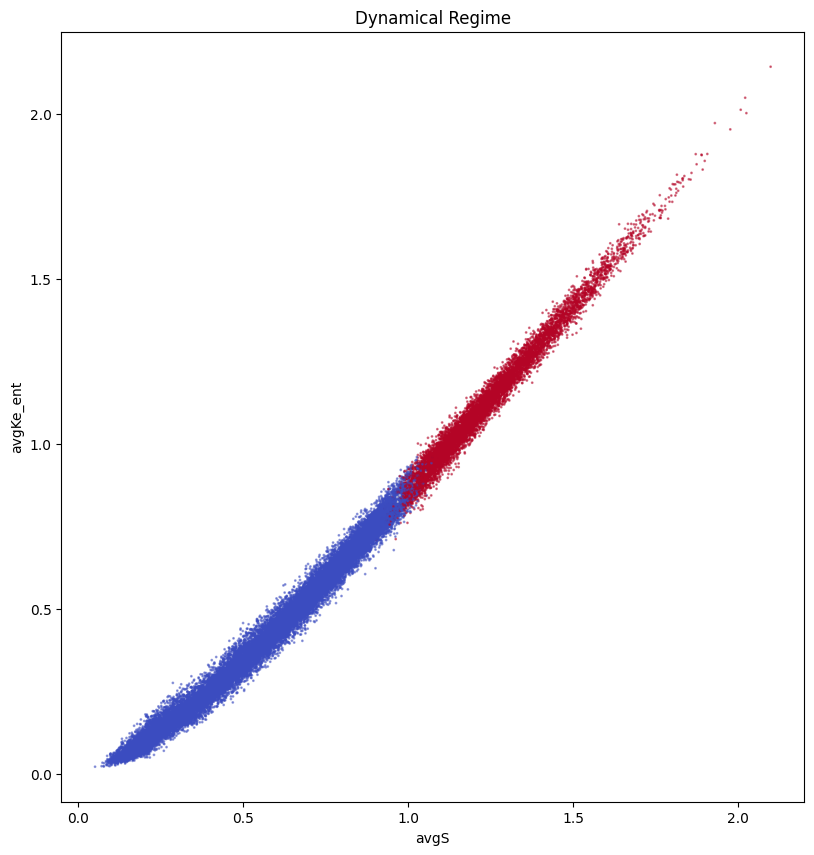

In [37]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgS'
vary = 'avgKe_ent'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['regime'],cmap=cmap,norm=CenteredNorm(vcenter=0,halfrange=1.0),alpha=0.5)
ax.set_aspect('equal', 'box')
plt.xlabel(varx)
plt.ylabel(vary)
plt.title("Dynamical Regime")
plt.show()

In [21]:
max([(np.mean(dfall['regime']==((dfall['avgSk']*scale>1).astype(int)-(dfall['avgSk']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9606837606837607, 1.0014999999999448)

In [22]:
max([(np.mean(dfall['regime']==((dfall['avgSe_sample']*scale>1).astype(int)-(dfall['avgSe_sample']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9618518518518518, 0.9929999999999457)

In [23]:
max([(np.mean(dfall['regime']==((dfall['avgSe']*scale>1).astype(int)-(dfall['avgSe']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9676923076923077, 0.9979999999999452)

In [24]:
max([(np.mean(dfall['regime']==((dfall['avgS']*scale>1).astype(int)-(dfall['avgS']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9785754985754985, 1.0019999999999447)

In [25]:
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)]))
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in [1]]))

(0.9726210826210826, 1.1704999999999262)
(0.9037321937321937, 1)


In [26]:
regime_truth = dfall['regime']
regime_S = ((dfall['avgS']>1).astype(int)-(dfall['avgS']<1).astype(int))
regime_Se = ((dfall['avgSe']>1).astype(int)-(dfall['avgSe']<1).astype(int))
regime_Sk = ((dfall['avgSk']>1).astype(int)-(dfall['avgSk']<1).astype(int))
regime_Ke_ent = ((dfall['avgKe_ent']*0.811>1).astype(int)-(dfall['avgKe_ent']*0.811<1).astype(int))

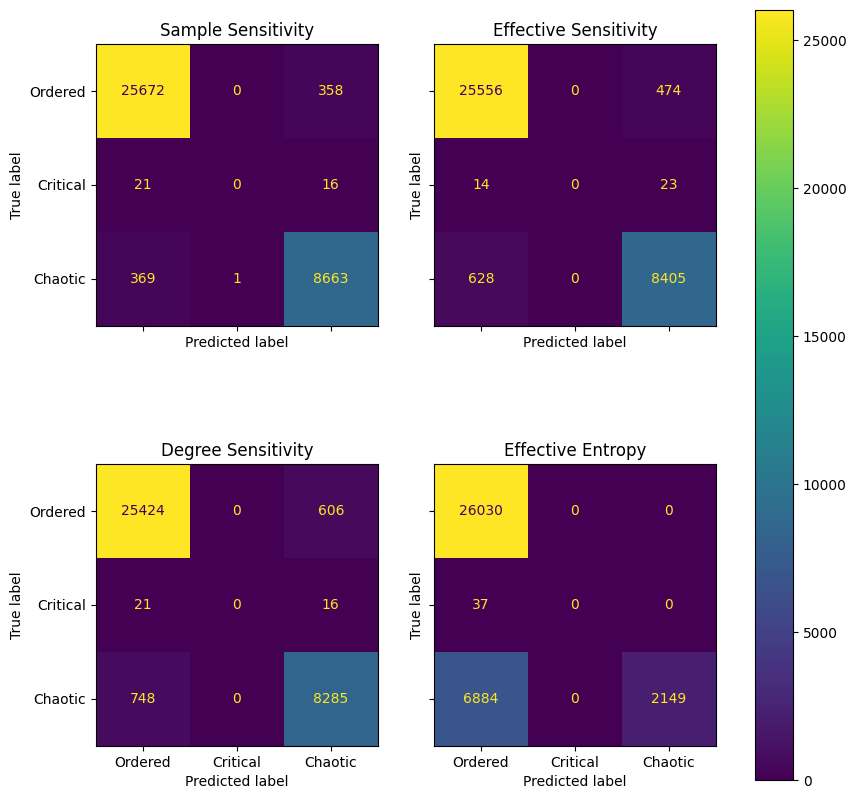

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey='row', sharex='col', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,0])
cm_display.im_.colorbar.remove()
ax[0,0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,1])
cm_display.im_.colorbar.remove()
ax[0,1].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,0])
cm_display.im_.colorbar.remove()
ax[1,0].set_title('Degree Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,1])
cm_display.im_.colorbar.remove()
ax[1,1].set_title('Effective Entropy')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

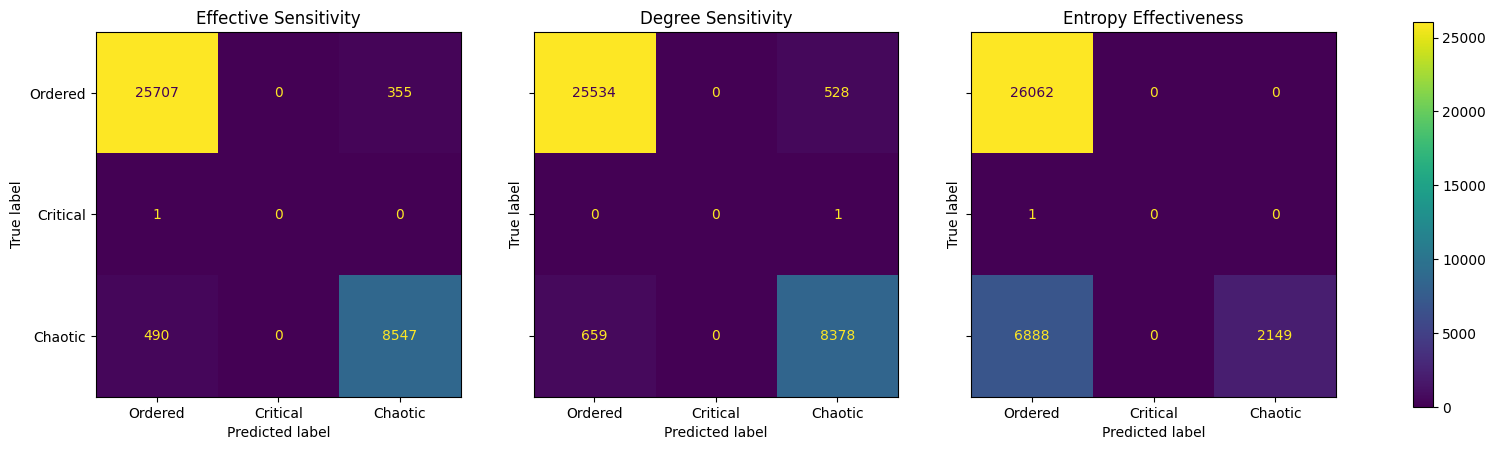

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='row', facecolor='white')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_S, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Degree Sensitivity')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[2])
cm_display.im_.colorbar.remove()
ax[2].set_title('Entropy Effectiveness')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

Text(0.5, 1.0, 'Entropy Effective Degree')

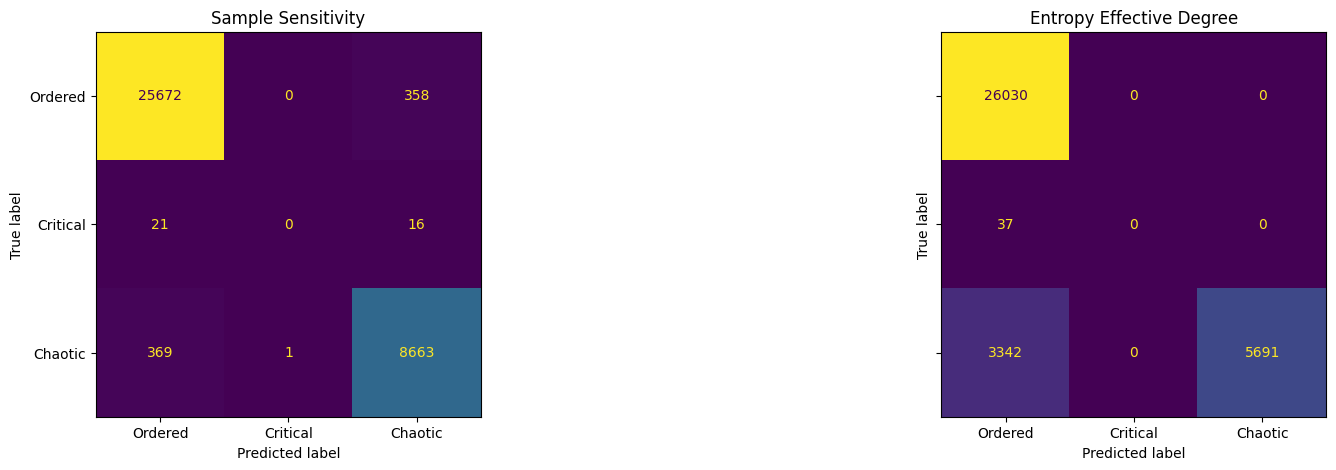

In [29]:
p = dfall['bias']
q = 1-dfall['bias']
pfunc = -(p*np.log(p))-(q*np.log(q))
pfunc*dfall['avgKe']
regime_ent = ((pfunc*dfall['avgKe']>1).astype(int)-(pfunc*dfall['avgKe']<1).astype(int))

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey='row', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Entropy Effective Degree')